In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

import nltk 
import random 
from nltk.tokenize import word_tokenize

nltk.download('punkt') 
nltk.download('stopwords') 
nltk.download('wordnet') 

Instructions for updating:
non-resource variables are not supported in the long term
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [2]:
# Imported the necessary libraries

import matplotlib.pyplot as plt
from nltk import FreqDist
import pandas as pd
import numpy as np


df = pd.read_csv("/content/drive/My Drive/train.tsv",delimiter='\t',encoding='utf-8')
df.head()


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


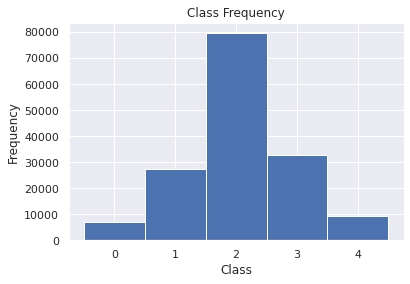

In [3]:
unique, counts = np.unique(df['Sentiment'], return_counts=True)

plt.bar(unique, counts, 1)

plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.savefig('class_dist.jpg')
plt.show()


In [4]:
dataset = df.sample(frac=1).reset_index(drop=True)
dataset.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,99516,5218,dysfunctionally,2
1,111952,5942,"essentially ruined -- or , rather",1
2,122259,6553,connect and express,2
3,14969,643,cold movie,1
4,55848,2792,controlling his crew,2


In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset ['Phrase'], dataset ['Sentiment'], test_size=0.3, random_state=2003)
documents=[]

X_train = np.array(X_train.values.tolist())
Y_train = np.array(Y_train.values.tolist())


for i in range(len(X_train)):
  documents.append([list(word_tokenize(X_train[i])), Y_train[i]]) 

X_test = np.array(X_test.values.tolist())
Y_test = np.array(Y_test.values.tolist())
for i in range(len(X_test)):
  documents.append([list(word_tokenize(X_test[i])), Y_test[i]]) 

documents[0]

[['A', 'comedy-drama', 'of', 'nearly', 'epic', 'proportions'], 3]

In [0]:
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer, PorterStemmer, LancasterStemmer 
porter = PorterStemmer() 
lancaster=LancasterStemmer() 
wordnet_lemmatizer = WordNetLemmatizer() 
stopwords_en = stopwords.words("english") 
punctuations="?:!.,;'\"-()"
#parameters to adjust to see the impact on outcome 
remove_stopwords = True
useStemming = False
useLemma = False
removePuncs = True


In [7]:
for l in range(len(documents)):                   #For each review document 
  label = documents[l][1]                         #Save review label 
  tmpReview = []                                  #Placeholder list for new review 
  for w in documents[l][0]:                       #For each word this is review 
    newWord = w                                   #Set newWork to be the updated word 
    if remove_stopwords and (w in stopwords_en):  #if the word is a stopword & we want to remove stopwords 
      continue                                    #skip the word and don’t had it to the normalized review 
    if removePuncs and (w in punctuations):       #if the word is a punc. & we want to remove punctuations 
      continue                                    #skip the word and don’t had it to the normalized review 
    if useStemming:
      #if useStemming is set to True 
      #Keep one stemmer commented out 
      #newWord = porter.stem(newWord) #User porter stemmer 
      newWord = lancaster.stem(newWord) #Use Lancaster stemmer 
    if useLemma: 
      newWord = wordnet_lemmatizer.lemmatize(newWord) 
    tmpReview.append(newWord)                     #Add normalized word to the tmp review 
  documents[l] = (tmpReview, label)             #Update the reviews list with clean review 
  documents[l] = (' '.join(tmpReview), label) 

print(documents[0])

('A comedy-drama nearly epic proportions', 3)


In [8]:
data = pd.DataFrame(documents, columns=['text', 'sentiment']) 
data.head(20)

,text,sentiment
0,A comedy-drama nearly epic proportions,3
1,action-packed experience ringside seat tough-m...,3
2,Performances around tops two leads delivering ...,3
3,generalities,2
4,'ll rewarded fine acting,4
5,crawl \*\*\* embarrassment,1
6,old-fashioned,1
7,one lucky,2
8,places world devastated war famine poverty doc...,2
9,` inside,2


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(data['text'],  data['sentiment'], test_size=0.3, random_state=2003)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from keras.utils import to_categorical

vectorizer = TfidfVectorizer(max_features = 2000,ngram_range=(2, 2)) 
X = vectorizer.fit_transform(data["text"]) 
Y = data['sentiment'] 
 
X_train = vectorizer.transform(X_train).toarray()
Y_train = Y_train 
X_test = vectorizer.transform(X_test).toarray()
Y_test = Y_test


Using TensorFlow backend.


In [0]:
# # Converts the datasets to numpy arrays to work with our PyTorch model 
# X_train = np.array(X_train)
# X_train = X_train.toarray() 
# Y_train = np.array(Y_train)

# # Convert the testing data 
# X_test = X_test.toarray() 
# Y_test = np.array(Y_test)
# print(x_train_np.shape)

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras import backend as K

In [0]:
batch_size = 64
num_classes = 5
epochs = 12

In [14]:
X_train.shape
# Y_train = to_categorical(Y_train,5)
# y_test = to_categorical(y_test,5)

(109242, 2000)

In [0]:
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)


In [0]:

from keras.preprocessing import sequence,text
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Input, Dense, Embedding, Flatten, GlobalAveragePooling1D
from keras.layers import SpatialDropout1D
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.models import Sequential


In [17]:

model = Sequential()
model.add(Conv1D(128, 10,  activation='relu', input_shape=(2000,1)))
model.add(Conv1D(128, 10, activation='relu'))
model.add(MaxPooling1D(pool_size=3))
model.add(Conv1D(256, 10, activation='relu', input_shape=(2000,1)))
model.add(Conv1D(256, 10, activation='relu'))
# model.add(MaxPooling1D(pool_size=3))
model.add(GlobalAveragePooling1D())
model.add(Dropout(rate = 0.50))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

# model.compile(loss=keras.losses.categorical_crossentropy,
#               optimizer=keras.optimizers.Adam(),
#               metrics=['accuracy'])

In [0]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [25]:
model.fit(X_train, Y_train,
          batch_size=64,
          epochs=50)
# _, accuracy = model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=0)
# score = model.evaluate(X_test, Y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

# model.save('1106924_1dconv_reg.h5')


Epoch 1/50
109242/109242 [==============================] - 80s 734us/step - loss: 0.4119 - acc: 0.8154 - f1_m: 0.4746 - precision_m: 0.5512 - recall_m: 0.4176
Epoch 2/50
109242/109242 [==============================] - 80s 733us/step - loss: 0.4119 - acc: 0.8154 - f1_m: 0.4744 - precision_m: 0.5507 - recall_m: 0.4176
Epoch 3/50
109242/109242 [==============================] - 80s 729us/step - loss: 0.4119 - acc: 0.8153 - f1_m: 0.4731 - precision_m: 0.5501 - recall_m: 0.4163
Epoch 4/50
109242/109242 [==============================] - 79s 722us/step - loss: 0.4119 - acc: 0.8153 - f1_m: 0.4720 - precision_m: 0.5498 - recall_m: 0.4151
Epoch 5/50
109242/109242 [==============================] - 79s 723us/step - loss: 0.4119 - acc: 0.8154 - f1_m: 0.4746 - precision_m: 0.5508 - recall_m: 0.4179
Epoch 6/50
109242/109242 [==============================] - 79s 723us/step - loss: 0.4120 - acc: 0.8153 - f1_m: 0.4716 - precision_m: 0.5500 - recall_m: 0.4148
Epoch 7/50
109242/109242 [==============

In [21]:
from keras.models import load_model

model = load_model('/content/1106924_1dconv_reg.h5',custom_objects = {'f1_m': f1_m,  'precision_m': precision_m, 'recall_m' : recall_m})
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 1991, 128)         1408      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1982, 128)         163968    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 660, 128)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 651, 256)          327936    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 642, 256)          655616    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)              

In [26]:
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, Y_test, verbose=0)

print('loss:\t', loss)
print('accuracy:\t', accuracy)
print('f1_score:\t', f1_score)
print('precision:\t', precision)
print('recall:\t', recall)

loss:	 0.41282419631775413
accuracy:	 0.8153872535863147
f1_score:	 0.4737326902990599
precision:	 0.5508104965216153
recall:	 0.41736084411978297
